In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_path = '/content/drive/MyDrive/dwave/'

In [6]:
def gen_daily_results(path):
    update_values = pd.read_pickle(path+'opt_results_df.pkl')
    initial_budget = update_values.loc[1, 'Value']
    initial_variance = update_values.iloc[0,-2]
    update_values['Value2'] = update_values['Value'] / initial_budget - 1
    update_values['Variance2'] = update_values['Variance'] / initial_variance - 1
    return update_values

In [16]:
def gen_baseline(path):
    update_values = pd.read_pickle(path+'df_baseline.pkl')
    return update_values

In [17]:
path = 'Run70/'
df70 = gen_daily_results(base_path+path)
df70_baseline = gen_baseline(base_path+path)

,Date,Value,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,...,XYL,YUM,ZBRA,ZBH,ZION,ZTS,Variance,Returns,Value2,Variance2
0,2019-01-07,99887.344171,0,5,1,6,1,0,3,6,...,0,3,0,0,5,0,A 2887938.88 AAL 2887938.88 AAP ...,A 9336344.29 AAL 9336344.29 AAP ...,-0.009680,A NaN AAL NaN AAP NaN AAPL NaN AB...
1,2019-01-08,100863.739939,0,6,1,6,1,2,16,1,...,0,4,3,6,3,1,A 2579697.93 AAL 2579697.93 AAP ...,A 8963187.93 AAL 8963187.93 AAP ...,0.000000,A NaN AAL NaN AAP NaN AAPL NaN AB...
2,2019-01-09,101606.994338,1,4,9,7,1,2,0,0,...,5,4,1,0,1,5,A 1873921.55 AAL 1873921.55 AAP ...,A 8887718.97 AAL 8887718.97 AAP ...,0.007369,A NaN AAL NaN AAP NaN AAPL NaN AB...
3,2019-01-10,102348.199286,2,3,0,1,0,5,3,2,...,2,4,0,1,9,1,A 1897875.73 AAL 1897875.73 AAP ...,A 8766654.56 AAL 8766654.56 AAP ...,0.014717,A NaN AAL NaN AAP NaN AAPL NaN AB...
4,2019-01-11,102339.983366,2,6,8,2,1,1,3,13,...,4,1,1,8,7,6,A 1680616.04 AAL 1680616.04 AAP ...,A 9314961.83 AAL 9314961.83 AAP ...,0.014636,A NaN AAL NaN AAP NaN AAPL NaN AB...


,Date,^GSPC
0,2019-01-07,0.000000
1,2019-01-08,0.009695
2,2019-01-09,0.013833
3,2019-01-10,0.018414
4,2019-01-11,0.018265


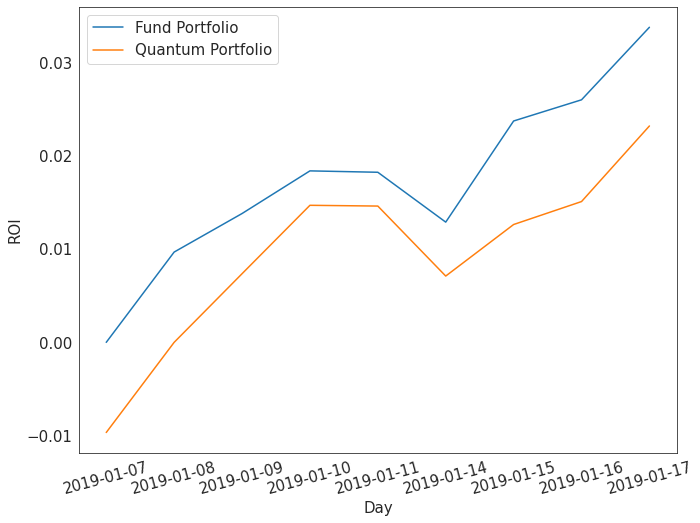

In [20]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(10.708,8.2))
plt.rc('font', size=15)
sns.lineplot(x='Date', y='^GSPC', data=df70_baseline, label='Fund Portfolio')
sns.lineplot(x='Date', y='Value2', data=df70, label='Quantum Portfolio')
plt.xticks(rotation=15)
plt.xlabel('Day')
plt.ylabel('ROI')
plt.legend()
plt.show()